## Telecom Churn Case study

### Business Problem
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, ___retaining high profitable customers is the number one business goal___.

To reduce customer churn, __telecom companies need to predict which customers are at high risk of churn__.

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

 __Importing Required Libraries__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings('ignore')
pd.set_option('max_columns',500)
pd.set_option('max_rows',500)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv('sample_data/telecom_churn_data.csv')
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
data.shape

(99999, 226)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


As checked above, there are 214 numeric columns and 12 non-numeric columns

In [5]:
# look at data statistics
data.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

#### In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase [Month 6 & 7]<br>
The ‘action’ phase [Month 8]<br>
The ‘churn’ phase [Month 9]<br><br>
In this case, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

### Data Preparation

Let us create some utility functions

In [6]:
# Method for Checking missing values percentages
def checkMissingPercent(dataset, cutoff):
    missing = round(100*(dataset.isnull().sum()/dataset.shape[0]))
    return missing.loc[missing>cutoff]

In [7]:
# Method for imputing data 
def imputeData(df, col_list):
    for i in [x + y for y in ['_6','_7','_8','_9'] for x in col_list]:
        df[i].fillna(0,inplace = True)

__Handling missing values__

In [8]:
mod_data=data.copy()

In [9]:
# Since mobile no has all unique values and represents a particular customer, it can be dropped from the dataset.
# Similarly, circle_id has all same values(109), it also can be dropped.
mod_data.drop(['mobile_number', 'circle_id'], axis=1, inplace=True)

In [10]:
# look at missing value ratio in each column
checkMissingPercent(mod_data, 0)

loc_og_t2o_mou               1.0
std_og_t2o_mou               1.0
loc_ic_t2o_mou               1.0
last_date_of_month_7         1.0
last_date_of_month_8         1.0
last_date_of_month_9         2.0
onnet_mou_6                  4.0
onnet_mou_7                  4.0
onnet_mou_8                  5.0
onnet_mou_9                  8.0
offnet_mou_6                 4.0
offnet_mou_7                 4.0
offnet_mou_8                 5.0
offnet_mou_9                 8.0
roam_ic_mou_6                4.0
roam_ic_mou_7                4.0
roam_ic_mou_8                5.0
roam_ic_mou_9                8.0
roam_og_mou_6                4.0
roam_og_mou_7                4.0
roam_og_mou_8                5.0
roam_og_mou_9                8.0
loc_og_t2t_mou_6             4.0
loc_og_t2t_mou_7             4.0
loc_og_t2t_mou_8             5.0
loc_og_t2t_mou_9             8.0
loc_og_t2m_mou_6             4.0
loc_og_t2m_mou_7             4.0
loc_og_t2m_mou_8             5.0
loc_og_t2m_mou_9             8.0
loc_og_t2f

As checked above, there are so many columns conatining missing values. Among them, there are some columns which has more than 70% of missing values. We will not directly delete those columns. Let us first check that these values as null because of no transactions or because of some other reason.

In [11]:
# getting all columns for month of June which has 75% missing values
cols = checkMissingPercent(mod_data, 74).index

mod_data.loc[mod_data.date_of_last_rech_data_6.isna(),cols].head()

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,fb_user_6
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As checked above, all the columns has null values where date of last recharge is missing. This is valid, we can replace these null values with 0 as there is no recharge done.

In [12]:
# imputing all the columns other than those containg date with 0 having more than 50% missing value
cols = list(filter(lambda x : not x.startswith('date') , checkMissingPercent(mod_data, 50).index))

mod_data[cols]=mod_data[cols].apply(lambda x: x.fillna(0))
mod_data[cols].head()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9
0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.0,1.0,2.0,0.0,0.0,154.0,25.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,154.0,50.0,0.0,0.00,0.00,0.00,0.00,0.00,28.61,7.60,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,46.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,0.00,0.00,0.00,2.84,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Checking again percent of missing values

In [13]:
checkMissingPercent(mod_data, 0)

loc_og_t2o_mou               1.0
std_og_t2o_mou               1.0
loc_ic_t2o_mou               1.0
last_date_of_month_7         1.0
last_date_of_month_8         1.0
last_date_of_month_9         2.0
onnet_mou_6                  4.0
onnet_mou_7                  4.0
onnet_mou_8                  5.0
onnet_mou_9                  8.0
offnet_mou_6                 4.0
offnet_mou_7                 4.0
offnet_mou_8                 5.0
offnet_mou_9                 8.0
roam_ic_mou_6                4.0
roam_ic_mou_7                4.0
roam_ic_mou_8                5.0
roam_ic_mou_9                8.0
roam_og_mou_6                4.0
roam_og_mou_7                4.0
roam_og_mou_8                5.0
roam_og_mou_9                8.0
loc_og_t2t_mou_6             4.0
loc_og_t2t_mou_7             4.0
loc_og_t2t_mou_8             5.0
loc_og_t2t_mou_9             8.0
loc_og_t2m_mou_6             4.0
loc_og_t2m_mou_7             4.0
loc_og_t2m_mou_8             5.0
loc_og_t2m_mou_9             8.0
loc_og_t2f

Let us have a look at the non-numeric columns

In [14]:
obj=mod_data.select_dtypes(include='object')
for i in obj.columns:
    print(i,'', obj[i].nunique(),'', obj[i].isna().sum()) 

last_date_of_month_6  1  0
last_date_of_month_7  1  601
last_date_of_month_8  1  1100
last_date_of_month_9  1  1659
date_of_last_rech_6  30  1607
date_of_last_rech_7  31  1767
date_of_last_rech_8  31  3622
date_of_last_rech_9  30  4760
date_of_last_rech_data_6  30  74846
date_of_last_rech_data_7  31  74428
date_of_last_rech_data_8  31  73660
date_of_last_rech_data_9  30  74077


We have already used date to fill the missing values. Further these date columns seems to be irrelevant in our analysis, so we will drop these columns

In [15]:
mod_data = mod_data.drop(obj.columns, axis=1)

Again checking for the missing values

In [16]:
checkMissingPercent(mod_data, 0)

loc_og_t2o_mou      1.0
std_og_t2o_mou      1.0
loc_ic_t2o_mou      1.0
onnet_mou_6         4.0
onnet_mou_7         4.0
onnet_mou_8         5.0
onnet_mou_9         8.0
offnet_mou_6        4.0
offnet_mou_7        4.0
offnet_mou_8        5.0
offnet_mou_9        8.0
roam_ic_mou_6       4.0
roam_ic_mou_7       4.0
roam_ic_mou_8       5.0
roam_ic_mou_9       8.0
roam_og_mou_6       4.0
roam_og_mou_7       4.0
roam_og_mou_8       5.0
roam_og_mou_9       8.0
loc_og_t2t_mou_6    4.0
loc_og_t2t_mou_7    4.0
loc_og_t2t_mou_8    5.0
loc_og_t2t_mou_9    8.0
loc_og_t2m_mou_6    4.0
loc_og_t2m_mou_7    4.0
loc_og_t2m_mou_8    5.0
loc_og_t2m_mou_9    8.0
loc_og_t2f_mou_6    4.0
loc_og_t2f_mou_7    4.0
loc_og_t2f_mou_8    5.0
loc_og_t2f_mou_9    8.0
loc_og_t2c_mou_6    4.0
loc_og_t2c_mou_7    4.0
loc_og_t2c_mou_8    5.0
loc_og_t2c_mou_9    8.0
loc_og_mou_6        4.0
loc_og_mou_7        4.0
loc_og_mou_8        5.0
loc_og_mou_9        8.0
std_og_t2t_mou_6    4.0
std_og_t2t_mou_7    4.0
std_og_t2t_mou_8

In [17]:
cols=list(checkMissingPercent(mod_data, 0).index)
mod_data[cols].describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9
count,98981.0,98981.0,98981.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000
mean,0.0,0.0,0.0,132.395875,133.670805,133.018098,130.302327,197.935577,197.045133,196.574803,190.337222,9.950013,7.149898,7.292981,6.343841,13.911337,9.818732,9.971890,8.555519,47.100763,46.473010,45.887806,44.584446,93.342088,91.397131,91.755128,90.463192,3.751013,3.792985,3.677991,3.655123,1.123056,1.368500,1.433821,1.232726,144.201175,141.670476,141.328209,138.709970,79.829870,83.299598,83.282673,82.342919,87.299624,90.804137,89.838390,86.276622,1.129011,1.115010,1.067792,1.042362,0.0,0.0,0.0,0.0,168.261218,175.221436,174.191498,169.664466,0.798277,0.776572,0.791247,0.723892,3.916811,4.978279,5.053769,4.412767,0.454157,0.030235,0.033372,0.047456,47.922365,47.990520,47.211362,46.281794,107.475650,107

As checked above, all the columns have their minimum value 0, but since the missing percent is very low around 4-5%, this can be because of technical or human error, its better to fill these values with median rather than 0. 

In [18]:
# filling the columns above with median
mod_data[cols]=mod_data[cols].apply(lambda x: x.fillna(x.median()))
mod_data[cols].head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9
0,0.0,0.0,0.0,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,65.11,63.685,0.00,61.84,0.00,0.00,0.00,0.00,3.95,3.635,0.00,2.50,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,0.88,0.93,1.15,0.96,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.89,5.96,0.00,5.38,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00
1,0.0,0.0,0.0,24.11,78.68,7.68,18.34,15.74,99.840,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.510,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.460,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.90,0.00,14.84,15.01,0.00,0.0,0.0,0.00,1.83,0.00,0.0,0.00,0.00,0.00,0.0,0.00
2,0.0,0.0,0.0,11.54,55.24,37.26,74.81,143.33,220.590,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.0,135.54,45.76,0.48,60.66,67.410,67.66,64.81,4.34,26.49,22.58,8.76,41.81,67.410,75.53,9.28,1.48,14.76,22.83,0.0,0.0,0.0,0.0,0.0,47.64,108.68,120.94,18.04,0.0,0.0,0.0,0.0,46.56,236.84,96.84,42.08,0.45,0.0,0.0,0.0,115.69,71.11,67.46,148.23,14.38,15.44,38.89,38.98,99.48,122.29,49.63,158.19,229.56,208.86,155.99,345.41,72.41,71.29,28.69,49.44,45.18,177.01,167.09,118.18,21.73,58.34,43.23,3.86,0.0,0.0,0.0,0.0,139.33,306.66,239.03,171.49,0.21,0.0,0.0,0.45,0.00,0.85,0.0,0.01,0.93,3.14,0.0,0.36
3,0.0,0.0,0.0,99.91,54.39,310.98,241.71,123.31,109.010,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.0,0.00,0.00,0.00,183.03,118.680,37.99,83.03,26.23,14.89,289.58,226.21,2.99,1.730,6.53,9.99,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,29.23,16.63,296

Checking if our missing value imputation is successfully done or not

In [19]:
all(mod_data.isna().sum()==0)

True

In [20]:
# removing duplicates from row
mod_data.drop_duplicates(inplace=True)
mod_data.shape

(99999, 212)

There are a few columns whose names are not consistent with other columns. Let make them same.

In [21]:
print(list(filter(lambda x: x[-1].isalpha(), mod_data.columns)))
mod_data.rename(columns={'aug_vbc_3g':'vbc_3g_8', 'jul_vbc_3g':'vbc_3g_7', 'jun_vbc_3g':'vbc_3g_6',
                         'sep_vbc_3g':'vbc_3g_9'}, inplace=True)
mod_data.head()

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']


,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,65.11,63.685,0.00,61.84,0.00,0.00,0.00,0.00,3.95,3.635,0.00,2.50,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,0.88,0.93,1.15,0.96,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.0,0.0,0.0,0.0,0.0,0

__Taking only the data of high valued customer by taking average of total recharge amount of good months__

In [22]:
mod_data['av_rech_amt_6_7']=((mod_data.av_rech_amt_data_6 * mod_data.total_rech_data_6 + mod_data.total_rech_amt_6)+
                             (mod_data.av_rech_amt_data_7 * mod_data.total_rech_data_7 + mod_data.total_rech_amt_7)) / 2

high_value_cust = mod_data[mod_data.av_rech_amt_6_7>mod_data.av_rech_amt_6_7.quantile(0.7)]

In [23]:
high_value_cust.shape

(29953, 213)

**Tagging the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:**
<br>
    1. total_ic_mou_9
    2. total_og_mou_9
    3. vol_2g_mb_9
    4. vol_3g_mb_9

In [24]:
high_value_cust['churn'] = (high_value_cust.total_ic_mou_9+high_value_cust.total_og_mou_9 + high_value_cust.vol_3g_mb_9 + high_value_cust.vol_2g_mb_9).apply(lambda x: 1 if x==0.0 else 0)
high_value_cust.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,av_rech_amt_6_7,churn
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,65.11,63.685,0.00,61.84,0.00,0.00,0.00,0.00,3.95,3.635,0.00,2.50,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,0.88,0.93,1.15,0.96,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0

In [25]:
high_value_cust.churn.value_counts()

0    27520
1     2433
Name: churn, dtype: int64

In [26]:
print('churn rate:', round((2433/27520)*100,2), '%')

churn rate: 8.84 %


Our dataset has high class imbalance, we will take care of it while building a model.

Removing all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [27]:
high_value_cust.drop(list(filter(lambda x: x[-1]=='9',high_value_cust.columns)), axis=1, inplace=True)
high_value_cust.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,av_rech_amt_6_7,churn
0,0.0,0.0,0.0,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.91,11.61,0.00,41.03,40.43,0.00,0.00,0.00,0.00,0.0,0.0,0.00,65.11,63.685,0.00,0.00,0.00,0.00,3.95,3.635,0.00,0.00,0.00,0.00,0.0,0.0,0.0,11.64,11.09,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,15.69,15.74,0.16,56.49,57.08,4.13,0.88,0.93,1.15,92.16,92.55,5.44,0.00,0.00,0.00,2.03,2.04,0.00,0.00,0.00,0.00,0.0,0.0,0.0,5.89,5.96,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,559.0,1
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.910,255.79,4.30,23.29,12.01,49.89,31.760,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,1185.0,1
8,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.0

In [28]:
high_value_cust.shape

(29953, 162)

As checked in the data dictionary, columns start with fb and night are schemes which are used for facebook and night packs respectively, so they are categorical columns(yes/no). Same as with churn columns. We will convert then to object type. This will help in doing EDA. 

In [29]:
cols=list(filter(lambda x: x.startswith('fb') or x.startswith('night'), high_value_cust.columns))
cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [30]:
cols.append('churn')
high_value_cust[cols]=high_value_cust[cols].astype('object')

### Exploratory Data Analysis

Let us create some utility functions

In [31]:
# method to get aggregate of both the good month columns (column_6 and column_7) having numeric data
def aggregateGoodMonths(dataframe, str1='6', str2='7'):
    li=[]
    s=set(filter( lambda x: x[-len(str1):]==str1, dataframe.select_dtypes(exclude='object').columns))
    s1=set(filter( lambda x:  x[-len(str2):]==str2, dataframe.select_dtypes(exclude='object').columns))
    for i in list(s):
        k=i[:-len(str1)]
        a=k+str1
        b=k+str2
        if  b in s1:
            dataframe[k+str1+'_'+str2]= (dataframe[b] + dataframe[a])/2
            li+=[a,b]
            s.remove(a); s1.remove(b)
        
    return dataframe.drop(li, axis=1)

In [32]:
# method to capp outliers
def cappingOutliers(dataframe, lower_quantile, upper_quantile, columns, cap=False):
    for i in columns:
        print('outliers in',i, ':', len(dataframe[i][(dataframe[i]>dataframe[i].quantile(upper_quantile)) | 
              (dataframe[i]<dataframe[i].quantile(lower_quantile))]))
        if cap:
            dataframe[i][dataframe[i]>dataframe[i].quantile(upper_quantile)] = dataframe[i].quantile(upper_quantile)
            dataframe[i][dataframe[i]<dataframe[i].quantile(lower_quantile)] = dataframe[i].quantile(lower_quantile)

In [33]:
def univariate(dataset,col,plt_type):
    if plt_type=='single':
        plt.figure(figsize=(10, 5))
        if dataset[col].dtypes != 'object':
            sns.distplot(dataset[col])
        else:
            sns.countplot(dataset[col])
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title( 'Frequency Plot of ' + str(col), color='Blue')
    else:
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
        col1, col2, col3 =col+'_6',col+'_7',col+'_8'
        if dataset[col1].dtypes != 'object':
            sns.distplot(dataset[col1], ax = ax1)
            sns.distplot(dataset[col2], ax = ax2)
            sns.distplot(dataset[col3], ax = ax3)
        else:
            sns.countplot(dataset[col1], ax = ax1)
            sns.countplot(dataset[col2], ax = ax2)
            sns.countplot(dataset[col3], ax = ax3)
        plt.subplots_adjust(wspace=0.5, hspace=0.5)
        fig.set_size_inches(13,5)
        fig.suptitle('Frequency Plot of ' + str(col), color = 'Blue')
    plt.show()

In [34]:
# ---- Bivariate Analysis ---- #
def bivariate(dataset, column, hue='churn', pattern=False):
    x=range(len(dataset))
    cols=dataset.filter(regex=column).columns
    fig, ax = plt.subplots(1,len(cols))
    ind=0
    if len(cols)==1:
        sns.boxplot( y=cols[0], data=dataset, x=hue)
    else:
        for i in cols:
            sns.boxplot( y=i, data=dataset, x=hue, ax=ax[ind])
            ind+=1
        
    if len(cols)>4:
        fig.set_size_inches(15,5)
        plt.subplots_adjust(wspace=0.7, hspace=0.1)
    else:
        fig.set_size_inches(10,5)
        plt.subplots_adjust(wspace=0.5, hspace=0.1)
    plt.show()


In [35]:
# A plot to show how a column vary in the month of June, July and August month against churn status.
def plot_vs_Churn(dataset,col):
    # per month churn vs Non-Churn
    fig, ax = plt.subplots(figsize=(7,4))
     
    colList=list([col+i for i in ('_6','_7','_8')])
    plt.plot(high_value_cust.groupby('churn')[colList].mean().T)
    ax.set_xticklabels(['Jun','Jul','Aug'])
    
    ## Add legend
    plt.legend(['Non-Churn', 'Churn'])
    
    # Add titles
    plt.title( str(col) +" V/S Month", fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.show()

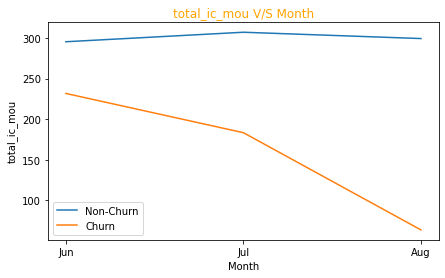

In [36]:
plot_vs_Churn(high_value_cust,'total_ic_mou')

__Observation__
1. Total incoming calls drops at a faster pace for the churners from the month of June to July.
2. For non-churners the graph is almost constant.

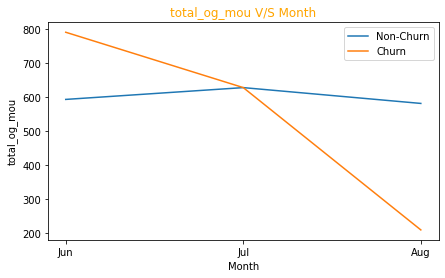

In [37]:
plot_vs_Churn(high_value_cust,'total_og_mou')

__Observation__
1. Total outgoing calls drops significantly for the churners from the month of June to July. We could also see that churners were quite higher in number than non churners in making outgoing calls in the month of June.
2. For non-churners the graph is remains constant.

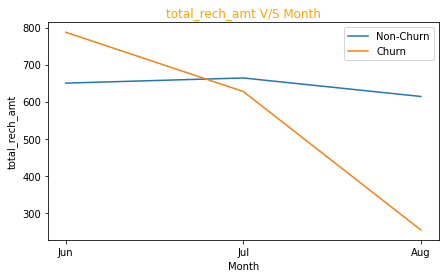

In [38]:
plot_vs_Churn(high_value_cust,'total_rech_amt')

__Observation__
1. Total recharge amount drops significantly for the churners from the month of June to July. We have also observed that churners were quite spending higher amount in recharging than non churners in the month of June.
2. For non-churners the graph is almost constant.

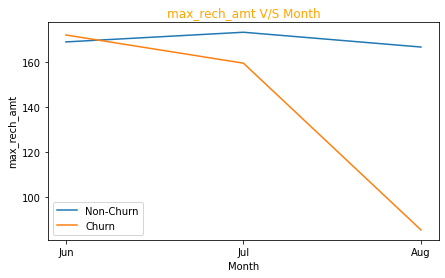

In [39]:
plot_vs_Churn(high_value_cust,'max_rech_amt')

__Observation__
1. Maximum recharge amount drops for the churners from the month of June to July and it dropped at a steep rate to August.
2. For non-churners the graph is almost constant.

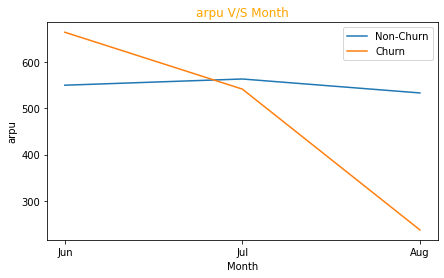

In [40]:
plot_vs_Churn(high_value_cust,'arpu')

__Observation__
1. Average Revenue Per User drops at a faster pace for the churners from the month of June to July.The ARPU from the churners was quite higher than the non-churners in the month of June.
2. While for non-churners the graph is almost constant.

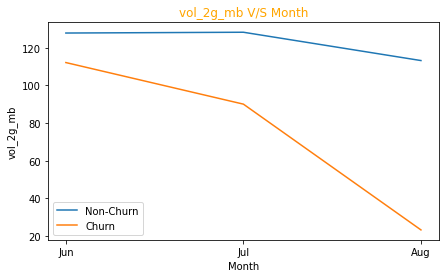

In [41]:
plot_vs_Churn(high_value_cust,'vol_2g_mb')

__Observation__
1. Usage volume of 2G data drops at a faster pace for the churners from the month of June to July.
2. While for non-churners the graph is significantly same.

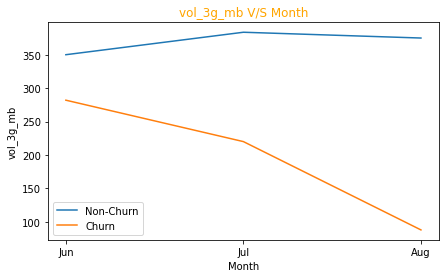

In [42]:
plot_vs_Churn(high_value_cust,'vol_3g_mb')

__Observation__
1. Usage volume of 3G data drops significantly for the churners from the month of June to July.
2. While for non-churners the graph is fairly same.

In [44]:
#After analysis we do not need these columns as we have got a derived column av_rech_amt_6_7
high_value_cust.drop(['av_rech_amt_data_6','total_rech_data_6','total_rech_amt_6','av_rech_amt_data_7',
               'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)

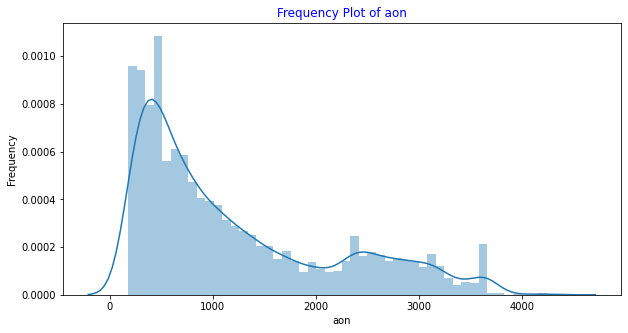

In [45]:
univariate(high_value_cust,'aon','single')

__Observation__<br>
The frequency of customers is highest for lower age on network while it gradually decreases then interestingly we could see a spike in frequency at 3200 around. 

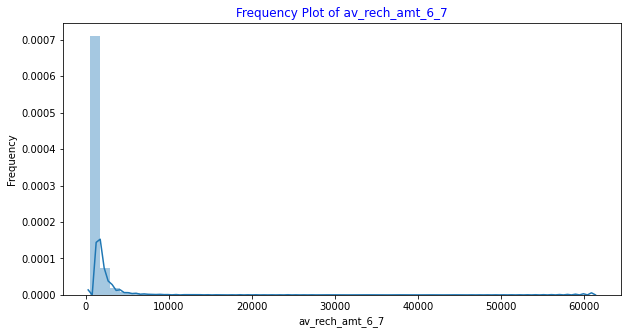

In [46]:
univariate(high_value_cust,'av_rech_amt_6_7','single')

__Observation__<br>
Most of the customers make smaller amount of recharges in the good phase.

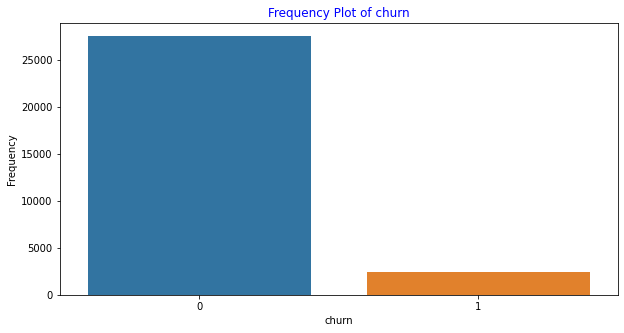

In [47]:
univariate(high_value_cust,'churn','single')

__Observation__<br>
We could clearly see the class imbalance here as the number of churns are far less than non churners.

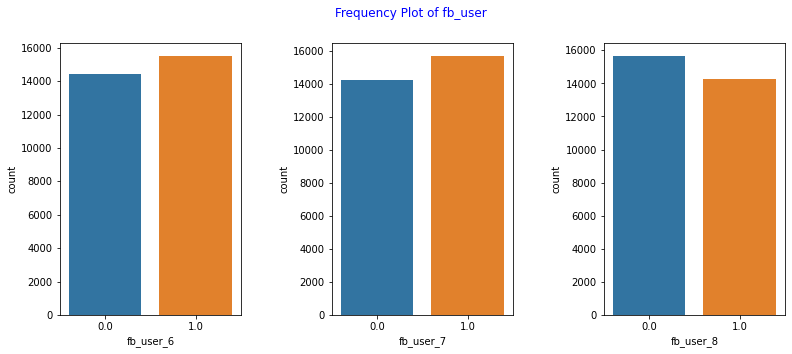

In [48]:
univariate(high_value_cust,'fb_user','multi')

__Observation__<br>
We could see from above frequency plots that from june to august the number of people purchasing fb_packs decreasing.

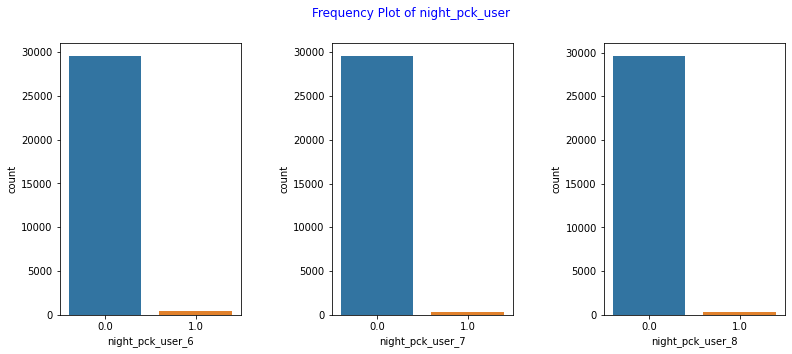

In [49]:
univariate(high_value_cust,'night_pck_user','multi')

__Observation__<br>
From the above frequency plots it can be seen that from june to august the number of people purchasing night_packs is fairly constant.Hence, this variable is not much significant for our analysis.

In [50]:
# Removing the night_pack columns as there is no siginificant difference in all the months
l=list(high_value_cust.filter(regex='night').columns)
high_value_cust.drop(l, axis=1, inplace=True)

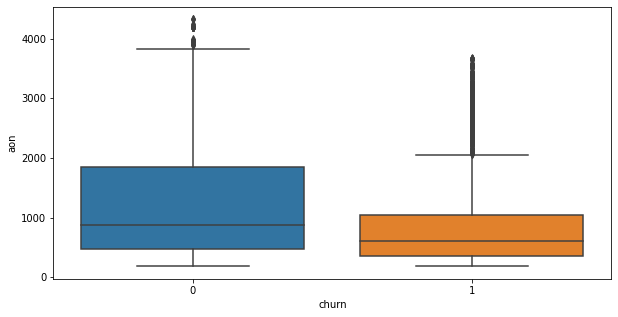

In [51]:
bivariate(high_value_cust,'aon','churn')

__Observation__<br>
From the above box plot it has been observed that age on network of non churners is more as compared to the churners.

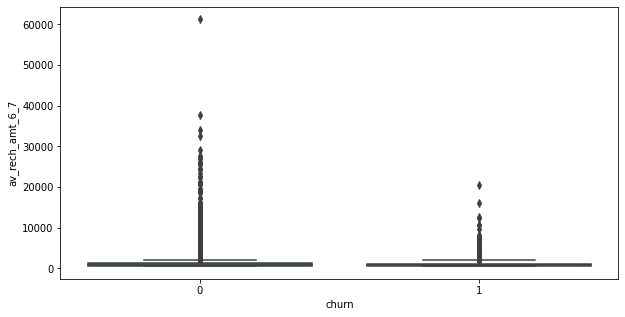

In [52]:
bivariate(high_value_cust,'av_rech_amt_6_7','churn')

__Observation__<br>
From the above box plot of average recharge amount of good phase months it can be seen that the average recharge amount is more for non churners than the churners.

#### Derived features

In [53]:
# aggregating the columns of good months
high_value_cust = aggregateGoodMonths(high_value_cust, '6', '7')

In [54]:
# getting average recharge amount for action month
high_value_cust['av_rech_amt_8']=(high_value_cust.av_rech_amt_data_8 * high_value_cust.total_rech_data_8 + 
                                  high_value_cust.total_rech_amt_8)

high_value_cust.drop(['av_rech_amt_data_8','total_rech_data_8','total_rech_amt_8'], axis=1, inplace=True)

Removing the numeric columns having more than 85% of values as a single value (highly skewed columns)

In [55]:
li=[]
for i in high_value_cust.select_dtypes(exclude='object').columns:
    if max(high_value_cust[i].value_counts())/len(high_value_cust) >0.85:
        li.append(i)

high_value_cust.drop(li, axis=1, inplace=True)

In [56]:
high_value_cust.shape

(29953, 89)

In [57]:
high_value_cust.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,sachet_2g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,av_rech_amt_6_7,churn,std_og_t2f_mou_6_7,onnet_mou_6_7,og_others_6_7,loc_og_mou_6_7,max_rech_amt_6_7,sachet_3g_6_7,roam_ic_mou_6_7,std_og_mou_6_7,isd_ic_mou_6_7,spl_ic_mou_6_7,arpu_2g_6_7,loc_ic_t2t_mou_6_7,sachet_2g_6_7,offnet_mou_6_7,loc_ic_t2f_mou_6_7,count_rech_2g_6_7,loc_ic_mou_6_7,total_og_mou_6_7,monthly_3g_6_7,vbc_3g_6_7,monthly_2g_6_7,max_rech_data_6_7,std_og_t2t_mou_6_7,loc_og_t2c_mou_6_7,spl_og_mou_6_7,last_day_rch_amt_6_7,roam_og_mou_6_7,loc_ic_t2m_mou_6_7,arpu_3g_6_7,std_ic_t2f_mou_6_7,total_ic_mou_6_7,std_ic_mou_6_7,std_og_t2m_mou_6_7,std_ic_t2m_mou_6_7,std_ic_t2t_mou_6_7,total_rech_num_6_7,vol_3g_mb_6_7,ic_others_6_7,loc_og_t2t_mou_6_7,loc_og_t2f_mou_6_7,count_rech_3g_6_7,vol_2g_mb_6_7,loc_og_t2m_mou_6_7,arpu_6_7,av_rech_amt_8
0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,4.13,1.15,5.44,0.00,0.00,0.00,0.00,5.44,0.00,0.00,2,252,252,252.0,0.0,1.0,5.75,109.61,212.17,212.17,0,1,1,1,968,30.40,559.0,1,0.00,33.32,0.0,64.3975,252.0,0.0,0.00,11.365,0.000,0.000,212.17,15.715,0.0,94.0225,0.905,0.0,92.355,0.000,1.0,50.600,0.0,252.0,0.000,0.0,0.00,252.0,0.000,56.785,212.170,0.000,0.000,5.925,3.7925,2.035,0.000,3.5,117.165,0.000,11.760,0.000,1.0,15.725,40.730,206.1005,504.0
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,77.84,6.50,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,31.59,15.14,7,1580,779,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0,0,0,0,802,57.74,1185.0,1,13.37,56.26,0.0,478.0350,1185.0,0.0,24.86,68.000,8.295,0.105,0.00,45.200,0.0,510.2950,126.810,0.0,391.555,548.385,0.0,19.060,0.0,0.0,13.795,0.0,2.25,0.0,18.165,219.525,0.000,43.215,592.250,176.810,40.8250,109.215,24.360,5.0,0.000,15.465,41.385,58.635,0.0,0.000,378.005,1209.5150,3638.0
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,98.28,10.23,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.00,0.00,14,30,10,23.0,3.0,0.0,0.03,11.94,19.83,0.00,3,0,1,1,315,21.03,696.0,0,0.00,382.36,0.0,333.1350,122.0,0.0,0.00,136.870,0.000,0.000,0.00,16.840,0.5,87.6450,0.000,1.0,52.630,470.010,0.0,516.405,0.5,77.0,124.995,0.0,0.00,25.0,0.000,35.780,0.000,0.000,66.175,13.545,11.8650,13.255,0.290,20.0,375.475,0.000,257.360,0.000,0.0,178.000,75.770,435.4720,327.0
21,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,938.79,0.00,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.00,0.00,27,50,50,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0,0,0,0,720,0.00,640.0,0,0.00,117.26,0.0,95.5650,50.0,0.0,0.00,848.990,0.000,0.000,0.00,6.335,0.0,827.3050,3.725,0.0,106.505,944.565,0.0,0.000,0.0,0.0,111.935,0.0,0.00,25.0,0.000,96.430,0.000,0.000,169.490,62.985,737.0500,52.960,10.020,24.0,0.000,0.000,5.320,0.375,0.0,0.000,89.870,556.1030,718.0
23,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,182.14,0.00,39.61,39.61,17.71,239.48,76.64,146.84,0.71,224.21,13.38,43.91,0.00,57.29,298.33,3.74,13.06,4,179,0,179.0,0.0,2.0,0.01,1009.92,197.27,150.67,0,0,1,1,604,40.45,583.0,0,0.00,49.81,0.0,132.7950,89.5,0.0,0.00,4.355,14.115,0.000,150.89,40.875,0.0,87.3850,0.000,0.0,145.520,137.210,1.0,25.930,0.0,89.5,0.000,0.0,0.05,89.5,0.000,104.635,153.285,0.000,171.235,8.915,4.3550,8.660,0.255,4.0,299.545,2.675,49.810,0.000,1.0,0.240,82.975,134.1235,979.0


__Outlier Treatment__

In [58]:
round(high_value_cust.describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.9,0.95,0.99]),2)

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,sachet_2g_8,aon,vbc_3g_8,av_rech_amt_6_7,std_og_t2f_mou_6_7,onnet_mou_6_7,og_others_6_7,loc_og_mou_6_7,max_rech_amt_6_7,sachet_3g_6_7,roam_ic_mou_6_7,std_og_mou_6_7,isd_ic_mou_6_7,spl_ic_mou_6_7,arpu_2g_6_7,loc_ic_t2t_mou_6_7,sachet_2g_6_7,offnet_mou_6_7,loc_ic_t2f_mou_6_7,count_rech_2g_6_7,loc_ic_mou_6_7,total_og_mou_6_7,monthly_3g_6_7,vbc_3g_6_7,monthly_2g_6_7,max_rech_data_6_7,std_og_t2t_mou_6_7,loc_og_t2c_mou_6_7,spl_og_mou_6_7,last_day_rch_amt_6_7,roam_og_mou_6_7,loc_ic_t2m_mou_6_7,arpu_3g_6_7,std_ic_t2f_mou_6_7,total_ic_mou_6_7,std_ic_mou_6_7,std_og_t2m_mou_6_7,std_ic_t2m_mou_6_7,std_ic_t2t_mou_6_7,total_rech_num_6_7,vol_3g_mb_6_7,ic_others_6_7,loc_og_t2t_mou_6_7,loc_og_t2f_mou_6_7,count_rech_3g_6_7,vol_2g_mb_6_7,loc_og_t2m_mou_6_7,arpu_6_7,av_rech_amt_8
count,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00
mean,508.89,235.61,338.73,12.51,19.89,78.61,153.39,5.89,1.70,238.36,148.59,157.45,307.91,6.55,551.93,63.29,148.58,14.45,227.06,13.92,28.00,2.56,44.64,280.07,11.02,1.23,9.98,160.22,92.44,72.54,1.21,0.41,105.87,351.83,62.83,58.45,1.06,1209.28,169.28,1153.70,1.82,265.08,0.35,255.92,170.81,0.22,14.39,355.86,11.35,0.04,64.16,66.38,1.14,377.71,15.69,1.32,234.53,619.39,0.22,168.89,0.18,79.01,170.14,1.73,6.47,100.66,23.38,152.12,67.91,2.75,293.53,48.05,183.77,30.06,15.16,11.79,357.60,1.33,85.38,6.39,0.44,125.82,163.93,559.99,1048.35
std,502.14,458.15,479.80,74.18,104.80,227.39,232.85,19.52,7.15,362.14,397.84,408.99,608.91,20.29,700.59,158.81,213.74,43.32,306.35,71.39,103.35,19.91,138.81,361.36,70.66,12.79,9.28,173.30,145.25,110.61,2.54,1.28,313.06,919.53,170.24,152.71,2.54,957.45,421.13,1359.53,11.54,439.56,2.47,357.74,154.29,0.95,66.11,583.28,73.29,0.15,147.09,157.17,2.42,456.83,44.38,2.40,300.15,651.97,0.57,393.00,0.39,103.25,385.84,6.48,17.31,115.99,93.32,206.53,162.86,17.92,351.17,133.39,394.05,93.99,75.11,8.64,840.51,13.74,222.37,20.97,1.12,299.87,231.89,430.14,1805.61
min,-945.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-24.49,-24.43,0.00,180.00,0.00,478.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-7.74,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-15.14,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-749.78,0.00
1%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,188.00,0.00,483.00,0.00,0.00,0.00,0.00,23.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.0

As checked above, most outliers lies above 99 and below 1 percentiles, so we will capp outliers on these percentiles

In [59]:
# call the function to check and cap the outliers
cols=list(high_value_cust.select_dtypes(exclude='object').columns) # columns to remove ouliers
cappingOutliers(high_value_cust, 0.01,0.99, cols, True)

outliers in arpu_8 : 390
outliers in onnet_mou_8 : 300
outliers in offnet_mou_8 : 300
outliers in roam_ic_mou_8 : 300
outliers in roam_og_mou_8 : 300
outliers in loc_og_t2t_mou_8 : 300
outliers in loc_og_t2m_mou_8 : 300
outliers in loc_og_t2f_mou_8 : 300
outliers in loc_og_t2c_mou_8 : 299
outliers in loc_og_mou_8 : 300
outliers in std_og_t2t_mou_8 : 300
outliers in std_og_t2m_mou_8 : 300
outliers in std_og_mou_8 : 300
outliers in spl_og_mou_8 : 300
outliers in total_og_mou_8 : 300
outliers in loc_ic_t2t_mou_8 : 300
outliers in loc_ic_t2m_mou_8 : 300
outliers in loc_ic_t2f_mou_8 : 300
outliers in loc_ic_mou_8 : 300
outliers in std_ic_t2t_mou_8 : 299
outliers in std_ic_t2m_mou_8 : 300
outliers in std_ic_t2f_mou_8 : 300
outliers in std_ic_mou_8 : 300
outliers in total_ic_mou_8 : 300
outliers in isd_ic_mou_8 : 300
outliers in ic_others_8 : 300
outliers in total_rech_num_8 : 277
outliers in max_rech_amt_8 : 286
outliers in last_day_rch_amt_8 : 296
outliers in max_rech_data_8 : 185
outliers 

__Analysis on Derived Features__

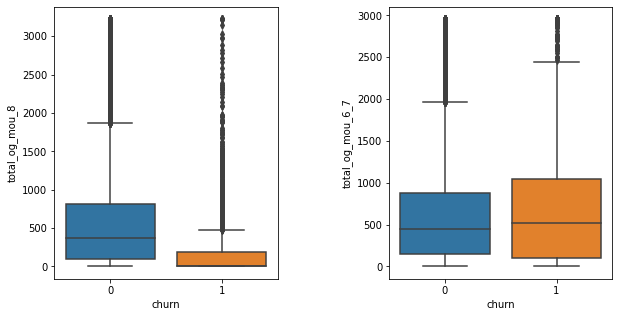

In [60]:
bivariate(high_value_cust, 'total_og_mou', 'churn', True)

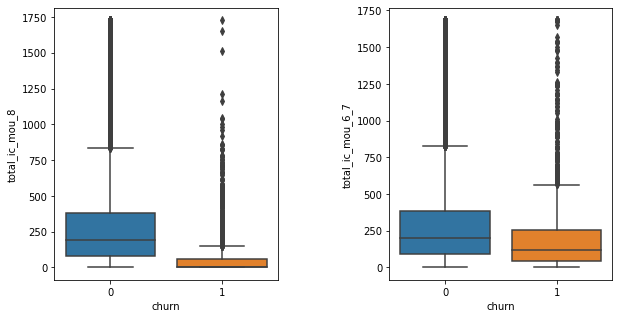

In [61]:
bivariate(high_value_cust, 'total_ic_mou', 'churn', pattern=True)

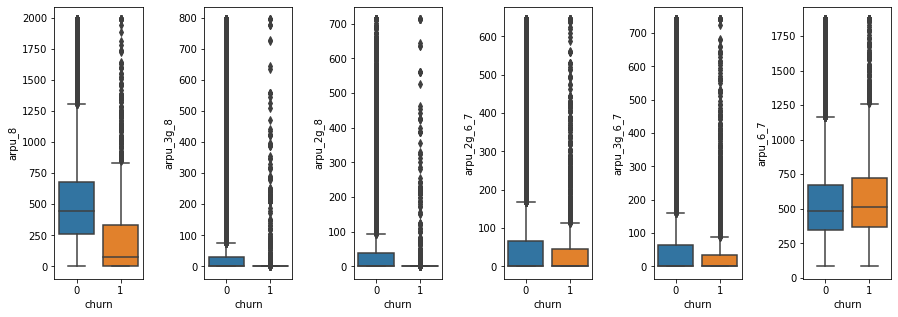

In [62]:
bivariate(high_value_cust,'arpu','churn', pattern=True)

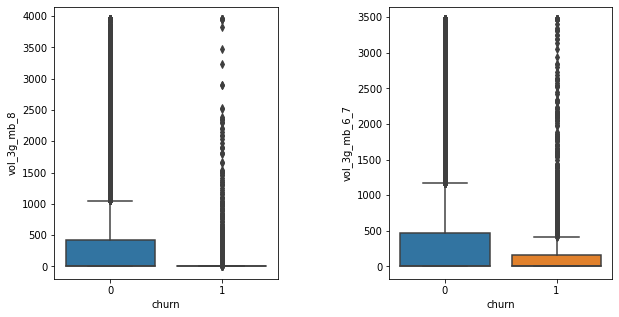

In [63]:
bivariate(high_value_cust,'vol_3g_mb','churn', pattern=True)

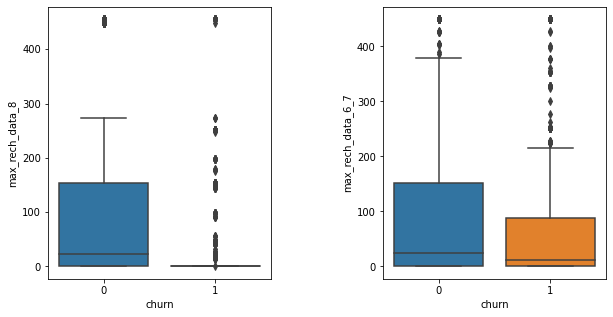

In [64]:
bivariate(high_value_cust,'max_rech_data','churn', pattern=True)

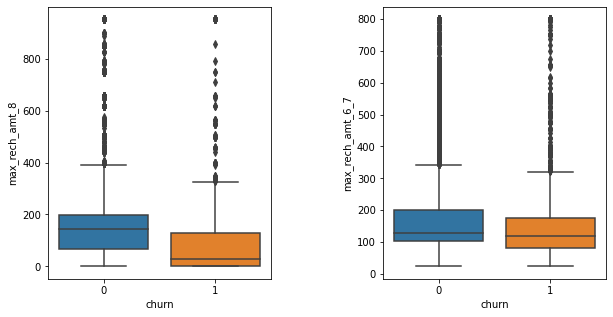

In [65]:
bivariate(high_value_cust,'max_rech_amt','churn', pattern=True)

In [66]:
# getting only those columns having absolute correlation > 0.8
cols=high_value_cust.select_dtypes(exclude='object').columns
l=set()
for i in range(len(cols)-1):
    for j in range(i+1,len(cols)):
        if i!=j:
            cor=high_value_cust[cols[i]].corr(high_value_cust[cols[j]])
            if abs(cor)>0.8:
                l.add(cols[i]);l.add(cols[j])

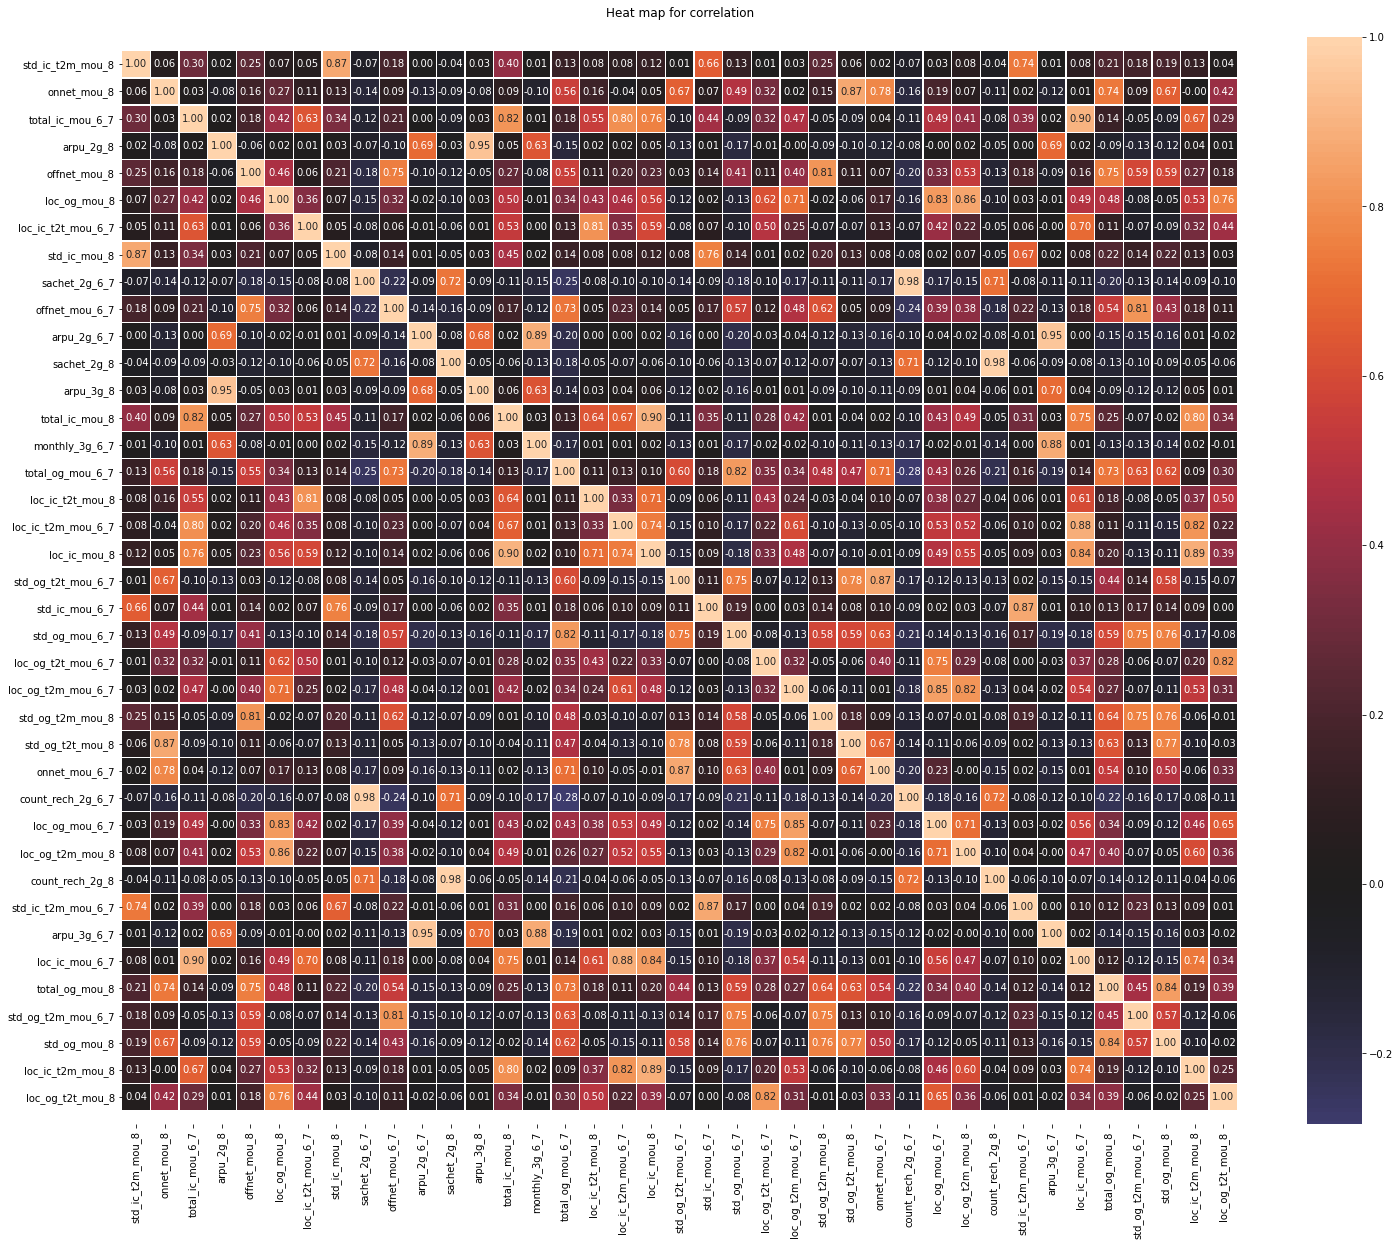

In [67]:
# Heat Map for checking correlation among variables
plt.figure(figsize=(25,20))
plt.title('Heat map for correlation', pad=20)
ax=sns.heatmap(high_value_cust[l].corr(), linewidth =0.3, center=0, annot=True, fmt='.2f')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

As we can see from above heat map that we there is high collinearity among the variables. So we will use pca with logistic regression and tree based models for model building as pca will remove collinearity and tress are prone to collinearity.

## Model Building

In [68]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

# !pip install imblearn
from imblearn.over_sampling import SMOTE

In [69]:
# converting object to numeric data type
l=list(high_value_cust.select_dtypes('object').columns)
high_value_cust[l] = high_value_cust[l].astype('int')

In [70]:
# divide data into train and test
X = high_value_cust.drop("churn", axis = 1)
y = high_value_cust.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [71]:
# print shapes of train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20967, 88) <class 'pandas.core.frame.DataFrame'>
(20967,)
(8986, 88) <class 'pandas.core.frame.DataFrame'>
(8986,)


__Scaling the data__

In [72]:
scaler =StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

__Handling the class imbalance__

In [74]:
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [75]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(38544, 88) <class 'numpy.ndarray'>
(38544,)
(8986, 88) <class 'numpy.ndarray'>
(8986,)


Some Utility functions

In [78]:
def getScores(confusion ):
    print('Confusion Matrix -')
    print(confusion)
    print('')
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    # Let's see the sensitivity of our logistic regression model
    print('sensitivity:',TP / float(TP+FN))
    print('')
    
    # Let us calculate specificity
    print('specificity:',TN / float(TN+FP))
    print('')
    

In [79]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs, drop_intermediate = False )
    auc_score =roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()


### Model 1 - PCA with logistic regression

In [80]:
# create PCA object
pca = PCA()

# fit to train data
X_train_pca = pca.fit_transform(X_train)

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      13.73
1      26.38
2      33.85
3      40.20
4      45.33
5      49.57
6      53.49
7      56.93
8      59.32
9      61.61
10     63.79
11     65.83
12     67.78
13     69.63
14     71.23
15     72.71
16     74.16
17     75.51
18     76.74
19     77.94
20     79.13
21     80.23
22     81.29
23     82.27
24     83.22
25     84.15
26     85.03
27     85.90
28     86.70
29     87.50
30     88.24
31     88.95
32     89.66
33     90.33
34     90.92
35     91.48
36     92.04
37     92.55
38     93.05
39     93.50
40     93.94
41     94.35
42     94.76
43     95.13
44     95.46
45     95.77
46     96.05
47     96.34
48     96.61
49     96.88
50     97.14
51     97.39
52     97.62
53     97.84
54     98.04
55     98.25
56     98.44
57     98.63
58     98.78
59     98.93
60     99.06
61     99.17
62     99.28
63     99.37
64     99.46
65     99.54
66     99.61
67     99.66
68     99.71
69     99.76
70     99.79
71     99.82
72     99.85
73     99.88
74     99.90
75     99.92
76     99.93

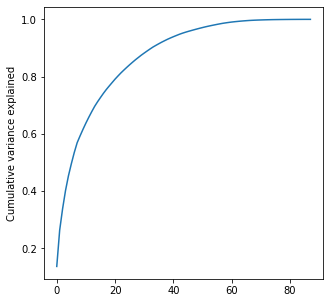

In [81]:
# plot cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[5,5])
plt.plot(cumulative_variance)
plt.ylabel("Cumulative variance explained")
plt.show()

As checked, 98% of total variance is explained by 55 variables. we will take these variables for PCA

In [82]:
# create pipeline
pca_components = 55
steps = [
         ("pca", IncrementalPCA(n_components=pca_components)),
         ("logistic", LogisticRegression(solver='liblinear'))
        ]
pipeline = Pipeline(steps)

In [83]:
# fit model
pipeline.fit(X_train, y_train)

# check score (mean accuracy score) on train data
print('mean accuracy score:',pipeline.score(X_train, y_train))
print('')
# predict churn on test data
y_pred_train = pipeline.predict(X_train)

# create predicted probabilities on test data
y_pred_prob_train = pipeline.predict_proba(X_train)[:, 1]

# create confusion matrix
confusion = confusion_matrix(y_train, y_pred_train)

# get scores
getScores(confusion)

# print auc-roc score
print("AUC-ROC Score on train data:", round(roc_auc_score(y_train, y_pred_prob_train),2))

mean accuracy score: 0.836057492735575

Confusion Matrix -
[[15869  3403]
 [ 2916 16356]]

sensitivity: 0.848692403486924

specificity: 0.8234225819842258

AUC-ROC Score on train data: 0.9


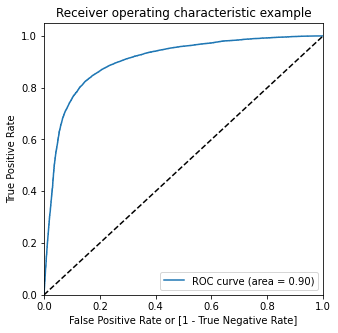

In [84]:
draw_roc(y_train, y_pred_prob_train)

In [85]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create predicted probabilities on test data
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

# check score (mean accuracy score) on train data
print('mean accuracy score:',pipeline.score(X_test, y_test))
print('')

# create confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# get scores
getScores(confusion)

# print auc-roc score
print("AUC-ROC Score on test data:", round(roc_auc_score(y_test, y_pred_prob),2))

mean accuracy score: 0.8294012908969508

Confusion Matrix -
[[6851 1397]
 [ 136  602]]

sensitivity: 0.8157181571815718

specificity: 0.8306256062075654

AUC-ROC Score on test data: 0.89



__Tuning hyper parameter__

In [86]:
# create pipeline 
steps = [
         ("pca", IncrementalPCA(n_components=pca_components)),
         ("logistic", LogisticRegression(solver='liblinear'))
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = { 'logistic__C': [0.01, 0.1, 0.5, 1, 2, 4, 5, 10], 'logistic__penalty': ['l1', 'l2'],
          'logistic__max_iter':[100, 300, 500, 1000]}

# create gridsearch object
logistic_tuned = GridSearchCV(estimator=pca_logistic, cv=5, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [87]:
logistic_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  3.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        IncrementalPCA(batch_size=None,
                                                       copy=True,
                                                       n_components=55,
                                                       whiten=False)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                  

In [88]:
# print best hyperparameters
print("Best AUC: ", logistic_tuned.best_score_)
print("Best hyperparameters: ", logistic_tuned.best_params_)

Best AUC:  0.9037551978239862
Best hyperparameters:  {'logistic__C': 10, 'logistic__max_iter': 100, 'logistic__penalty': 'l2'}


In [89]:
# predict churn on test data
y_pred = logistic_tuned.predict(X_test)

# create predicted probabilities on test data
y_pred_prob = logistic_tuned.predict_proba(X_test)[:, 1]

# check score (mean accuracy score) on train data
print('mean accuracy score:',logistic_tuned.score(X_test, y_test))
print('')

# create confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# get scores
getScores(confusion)

# print auc-roc score
print("AUC-ROC Score on test data:", round(roc_auc_score(y_test, y_pred_prob),2))

mean accuracy score: 0.8924959060453844

Confusion Matrix -
[[6851 1397]
 [ 136  602]]

sensitivity: 0.8157181571815718

specificity: 0.8306256062075654

AUC-ROC Score on test data: 0.89


__Model Optimization by taking optimal cutoff value for logistic regression__

In [90]:
logistic_df = pd.DataFrame({'y_train':y_train, 'y_pred_prob_train':logistic_tuned.predict_proba(X_train)[:,1]})
logistic_df.head()

,y_train,y_pred_prob_train
0,0,0.174878
1,0,0.075658
2,0,0.074433
3,1,0.596551
4,0,0.030867


In [91]:
# Let's create columns with different probability cutoffs 
numbers = np.arange(0.4,0.61,0.02)
print(numbers)
for i in numbers:
    logistic_df['cutoff_'+str(round(i,2))]= logistic_df.y_pred_prob_train.map(lambda x: 1 if x > i else 0)
logistic_df.head()

[0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54 0.56 0.58 0.6 ]


,y_train,y_pred_prob_train,cutoff_0.4,cutoff_0.42,cutoff_0.44,cutoff_0.46,cutoff_0.48,cutoff_0.5,cutoff_0.52,cutoff_0.54,cutoff_0.56,cutoff_0.58,cutoff_0.6
0,0,0.174878,0,0,0,0,0,0,0,0,0,0,0
1,0,0.075658,0,0,0,0,0,0,0,0,0,0,0
2,0,0.074433,0,0,0,0,0,0,0,0,0,0,0
3,1,0.596551,1,1,1,1,1,1,1,1,1,1,0
4,0,0.030867,0,0,0,0,0,0,0,0,0,0,0


In [92]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['accuracy','sensitivity','specificity'])

for i in logistic_df.iloc[:,2:].columns:
    confusion = confusion_matrix(logistic_df['y_train'], logistic_df[i])    
    speci = confusion[0,0]/(confusion[0,0]+confusion[0,1])
    sensi = confusion[1,1]/(confusion[1,0]+confusion[1,1])
    accuracy = (confusion[0,0]+confusion[1,1])/sum(sum(confusion))
    cutoff_df.loc[i] =[accuracy, sensi, speci]
print(cutoff_df)

             accuracy  sensitivity  specificity
cutoff_0.4   0.824201     0.889010     0.759392
cutoff_0.42  0.827288     0.881538     0.773039
cutoff_0.44  0.830402     0.873495     0.787308
cutoff_0.46  0.832296     0.865919     0.798672
cutoff_0.48  0.834112     0.857462     0.810762
cutoff_0.5   0.836032     0.848692     0.823371
cutoff_0.52  0.836810     0.840027     0.833593
cutoff_0.54  0.837951     0.830791     0.845112
cutoff_0.56  0.838081     0.820205     0.855957
cutoff_0.58  0.836862     0.808323     0.865401
cutoff_0.6   0.835902     0.796596     0.875208


In [93]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
# cutoff_df.plot.line(y=['accuracy','sensitivity','specificity'], figsize=(10,5))


In [94]:
# taking cutoff as 0.45 to increase sensitivity and maintaining specificity
cutoff = 0.45

# create predicted probabilities on test data
y_pred_prob = logistic_tuned.predict_proba(X_test)[:, 1]
y_pred=pd.Series(y_pred_prob).map(lambda x: 1 if x > cutoff else 0)


# check score (mean accuracy score) on train data
print('mean accuracy score:',logistic_tuned.score(X_test, y_test))
print('')

# create confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# get scores
getScores(confusion)


mean accuracy score: 0.8924959060453844

Confusion Matrix -
[[6600 1648]
 [ 118  620]]

sensitivity: 0.8401084010840109

specificity: 0.8001939864209505



This model gives a sensitivity of 84% with overall accuracy of 89% on test data

### Model2 - Decision Tree

In [95]:
# Fitting the decision tree with default hyperparameters
dt_default = DecisionTreeClassifier()
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Confusion Matrix -
[[7502  746]
 [ 324  414]]

sensitivity: 0.5609756097560976

specificity: 0.9095538312318138

AUC-ROC Score on test data: 0.74


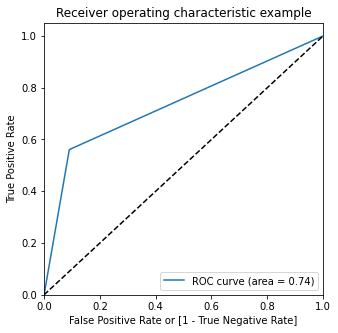

In [96]:
# Making predictions
y_pred_default = dt_default.predict(X_test)

# create onfusion matrix
confusion = confusion_matrix(y_test, y_pred_default)

getScores(confusion)

# check area under curve
y_pred_prob = dt_default.predict_proba(X_test)[:, 1]
print("AUC-ROC Score on test data:", round(roc_auc_score(y_test, y_pred_prob),2))

draw_roc(y_test, y_pred_prob)

__Hyperparameter tuning__

In [97]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search_df = GridSearchCV(estimator = dtree, param_grid = param_grid, scoring='roc_auc', cv = 3, verbose = 1)

# Fit the grid search to the data
grid_search_df.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  1.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                   

In [98]:
# printing the optimal accuracy score and hyperparameters
print("Best AUC: ", grid_search_df.best_score_)
print("Best hyperparameters: ", grid_search_df.best_estimator_)

Best AUC:  0.9576935645865675
Best hyperparameters:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


accuracy: 0.8823127689327329

Confusion Matrix -
[[7379  869]
 [ 189  549]]

sensitivity: 0.7439024390243902

specificity: 0.8946411251212415

AUC-ROC Score on test data: 0.88


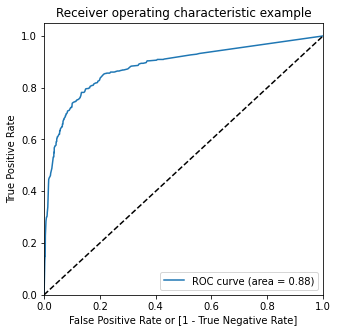

In [99]:
# Making predictions
y_pred_default = grid_search_df.predict(X_test)

# create onfusion matrix
confusion = confusion_matrix(y_test, y_pred_default)

print('accuracy:', grid_search_df.score(X_test, y_test))
print('')
getScores(confusion)

# check area under curve
y_pred_prob = grid_search_df.predict_proba(X_test)[:, 1]
print("AUC-ROC Score on test data:", round(roc_auc_score(y_test, y_pred_prob),2))

draw_roc(y_test, y_pred_prob)

This tuned model gives sensitivity of 74% and auc score 88%

### Model3 - Random Forest

Confusion Matrix -
[[7950  298]
 [ 271  467]]

sensitivity: 0.6327913279132791

specificity: 0.9638700290979632

AUC-ROC Score on test data: 0.93


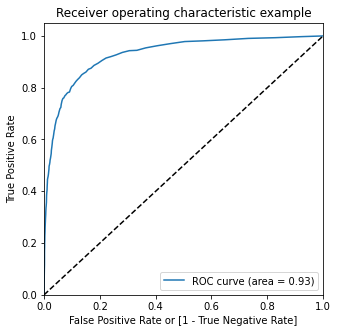

In [100]:
# Create a based model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# predict churn on test data
y_pred = rf.predict(X_test)

# create onfusion matrix
confusion = confusion_matrix(y_test, y_pred)

getScores(confusion)

# check area under curve
y_pred_prob = rf.predict_proba(X_test)[:, 1]
print("AUC-ROC Score on test data:", round(roc_auc_score(y_test, y_pred_prob),2))

draw_roc(y_test, y_pred_prob)

In [101]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='roc_auc', cv = 3, n_jobs = -1,verbose = 1)


In [102]:
# fit model
grid_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 31.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [103]:
# print best hyperparameters
print("Best AUC-ROC Score on train data: ", grid_search_rf.best_score_)
print("Best hyperparameters: ", grid_search_rf.best_params_)

Best AUC-ROC Score on train data:  0.9618574793078261
Best hyperparameters:  {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


accuracy: 0.8823127689327329

Confusion Matrix -
[[7572  676]
 [ 177  561]]

sensitivity: 0.7601626016260162

specificity: 0.9180407371483996

AUC-Roc Score on test data: 0.93


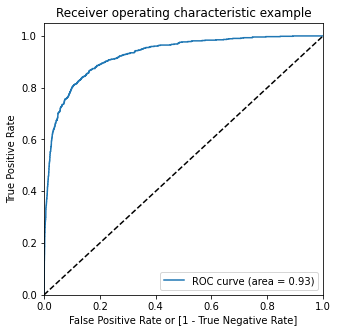

In [104]:
# predict churn on test data
y_pred = grid_search_rf.predict(X_test)

# create onfusion matrix
confusion = confusion_matrix(y_test, y_pred)

print('accuracy:', grid_search_df.score(X_test, y_test))
print('')

#get scores
getScores(confusion)

# check area under curve
y_pred_prob = grid_search_rf.predict_proba(X_test)[:, 1]
print("AUC-Roc Score on test data:", round(roc_auc_score(y_test, y_pred_prob),2))

draw_roc(y_test, y_pred_prob)

This tuned model gives sensitivity of 76% and auc score 93%

### Model4 - XGBoost

Let's finally try XGBoost. The hyperparameters are the same, some important ones being ```subsample```, ```learning_rate```, ```max_depth``` etc.


In [106]:
# fit model on training data with default hyperparameters
xgb_default = XGBClassifier()
xgb_default.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [109]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred_prob = xgb_default.predict_proba(X_test)[:, 1]
y_pred=xgb_default.predict(X_test)

Confusion Matrix -
[[7683  565]
 [ 199  539]]

sensitivity: 0.7303523035230353

specificity: 0.9314985451018428

AUC-Roc Score on test data: 0.91


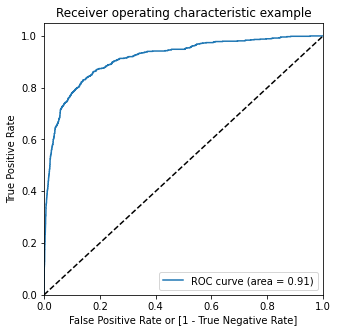

In [110]:
# evaluate predictions
# create onfusion matrix
confusion = confusion_matrix(y_test, y_pred)

#get scores
getScores(confusion)

# check area under curve
print("AUC-Roc Score on test data:", round(roc_auc_score(y_test, y_pred_prob),2))

draw_roc(y_test, y_pred_prob)

__Hyperparameter tuning__

In [111]:
# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
xgb_tuned = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = 3, 
                        verbose = 1,
                        return_train_score=True)      



In [114]:
# fit the model
xgb_tuned.fit(X_train, y_train) 

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  4.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [115]:
# print best hyperparameters
print("Best AUC-ROC Score on train data: ", xgb_tuned.best_score_)
print("Best hyperparameters: ", xgb_tuned.best_params_)

Best AUC-ROC Score on train data:  0.9881924458444283
Best hyperparameters:  {'learning_rate': 0.6, 'subsample': 0.9}


In [116]:
# predict
y_pred = xgb_tuned.predict(X_test)
y_pred_prob = xgb_tuned.predict_proba(X_test)[:, 1]

accuracy: 0.9056391103435769

Confusion Matrix -
[[7969  279]
 [ 317  421]]

sensitivity: 0.5704607046070461

specificity: 0.9661736178467507

AUC-Roc Score on test data: 0.91


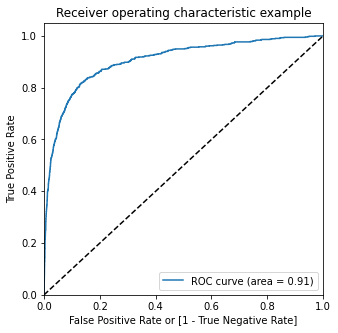

In [117]:
# evaluate predictions
# create confusion matrix
confusion = confusion_matrix(y_test, y_pred)

print('accuracy:', xgb_tuned.score(X_test, y_test))
print('')

#get scores
getScores(confusion)

# check area under curve
print("AUC-Roc Score on test data:", round(roc_auc_score(y_test, y_pred_prob),2))

draw_roc(y_test, y_pred_prob)

This tuned model gives sensitivity of 57% and auc score 91%

In [118]:
index=['Sensitivity', 'Specificity', 'Auc', 'Accuracy']
results = pd.DataFrame({'Model 1':[84,80,89,90],'Model 2': [74, 88, 89, 88], 'Model 3':[76, 92, 93, 88],
                        'Model 4': [57, 97, 91, 90]}, index=index)
print('Final results on test data -')
results

Final results on test data -


,Model 1,Model 2,Model 3,Model 4
Sensitivity,84,74,76,57
Specificity,80,88,92,97
Auc,89,89,93,91
Accuracy,90,88,88,90


As seen in the above table, Model 1 gives the highest sensitivity with high accuracy, so we will use this model for prediction.<br> and we can use Model 3 for getting top features

In [119]:
# save the models
# import pickle
# pickle.dump(logistic_tuned, open('model1.pkl','wb'))
# pickle.dump(grid_search_df, open('model2.pkl','wb'))
# pickle.dump(grid_search_rf, open('model3.pkl','wb'))
# pickle.dump(xgb_tuned, open('model4.pkl','wb'))


In [120]:
# load the random forest model
#rf_loaded = pickle.load(open('model3.pkl','rb'))
rf_loaded = grid_search_rf

In [121]:
# feature importance
index=list(high_value_cust.columns)
index.remove('churn')
importance = pd.DataFrame({'Importance': np.round(100*rf_loaded.best_estimator_.feature_importances_,2)},
                          index=index)
top_10 = importance.sort_values('Importance', ascending=False).head(10)
top_10

,Importance
total_ic_mou_8,11.27
av_rech_amt_8,9.86
roam_og_mou_8,7.25
arpu_8,6.48
roam_ic_mou_8,6.06
loc_ic_t2m_mou_8,4.90
loc_ic_mou_8,4.83
last_day_rch_amt_8,4.77
max_rech_amt_8,4.69
total_og_mou_8,3.91


In [122]:
top_10_cols=list(top_10.index)
X_train_10 = pd.DataFrame(X_train, columns=X.columns)[top_10_cols]
X_test_10 = pd.DataFrame(X_test, columns=X.columns)[top_10_cols]

accuracy: 0.8801468951702649
Confusion Matrix -
[[7322  926]
 [ 151  587]]

sensitivity: 0.7953929539295393

specificity: 0.8877303588748787

AUC-ROC Score on test data: 0.91


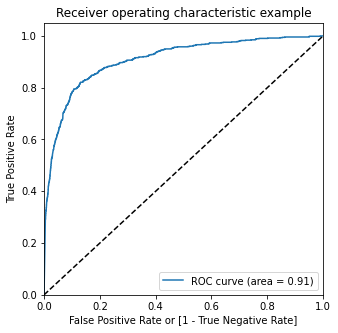

In [123]:
# Fitting the decision tree with default hyperparameters
rf_10 = rf_loaded.best_estimator_
rf_10.fit(X_train_10, y_train)

print('accuracy:',rf_10.score(X_test_10, y_test))

# Making predictions
y_pred_default = rf_10.predict(X_test_10)

# create onfusion matrix
confusion = confusion_matrix(y_test, y_pred_default)

getScores(confusion)

# check area under curve
y_pred_prob = rf_10.predict_proba(X_test_10)[:, 1]
print("AUC-ROC Score on test data:", round(roc_auc_score(y_test, y_pred_prob),2))

draw_roc(y_test, y_pred_prob)

When tested with top 10 features, our model gives sensitivity of 80% with AUC of 91% and overall accuracy 88%

#### Top 10 variables on which company should focus are :
    - total_ic_mou_8
    - av_rech_amt_8 (Total recharge amount including data and other recharges)
    - roam_og_mou_8
    - arpu_8
    - roam_ic_mou_8
    - loc_ic_t2m_mou_8
    - loc_ic_mou_8
    - last_day_rch_amt_8
    - max_rech_amt_8
    - total_og_mou_8

## Recommendations
1.  